# Watershed - Red Blood Cells Challenge

In [2]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

import cv2
import matplotlib.pyplot as plt
import numpy as np


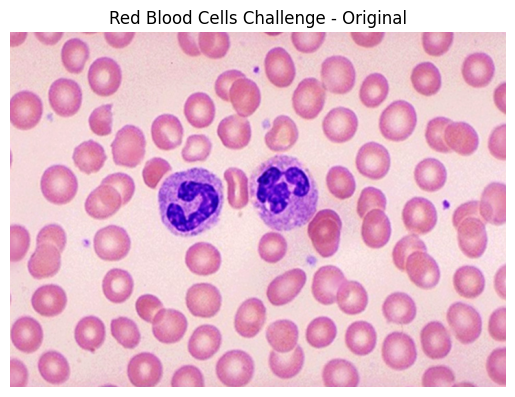

In [3]:
image = cv2.imread('images/rbc.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

title = 'Red Blood Cells Challenge'

plt.imshow(image)
plt.title(f'{title} - Original')
plt.axis('off')
plt.show()

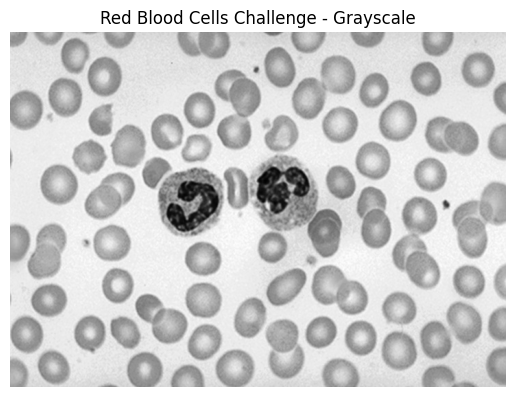

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title(f'{title} - Grayscale')
plt.axis('off')
plt.show()

Thresholded value by Otsu's Method: 186.0


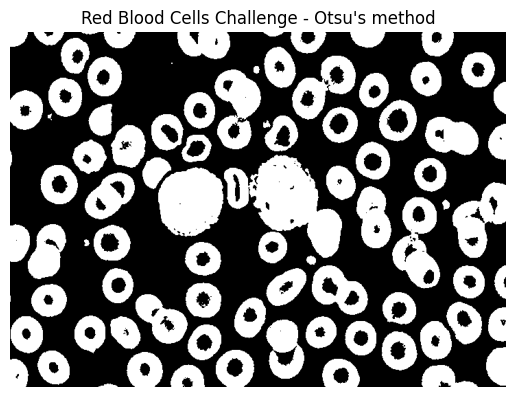

In [5]:
threshold_value, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(f'Thresholded value by Otsu\'s Method: {threshold_value}')

plt.imshow(thresholded_image, cmap='gray')
plt.title(f'{title} - Otsu\'s method')
plt.axis('off')
plt.show()

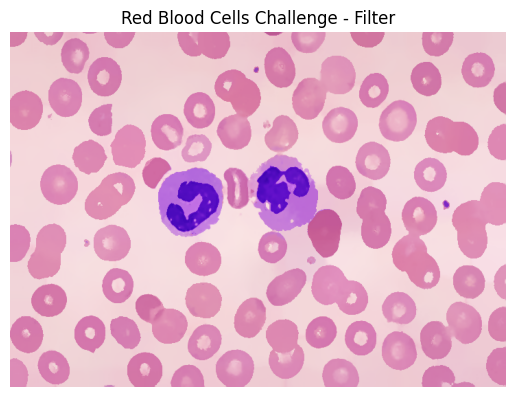

In [6]:
filter_image = cv2.pyrMeanShiftFiltering(image, 20, 40)

plt.imshow(filter_image, cmap='gray')
plt.title(f'{title} - Filter')
plt.axis('off')
plt.show()

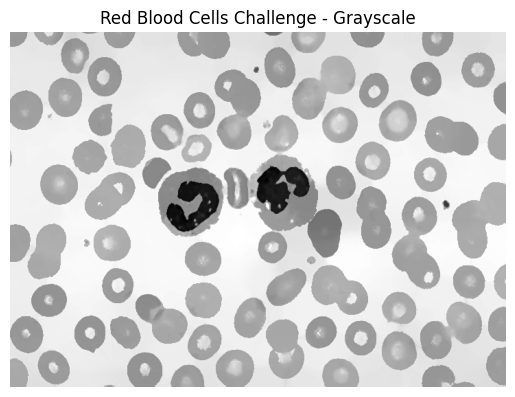

In [7]:
gray_image = cv2.cvtColor(filter_image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title(f'{title} - Grayscale')
plt.axis('off')
plt.show()

Thresholded value by Otsu's Method: 189.0


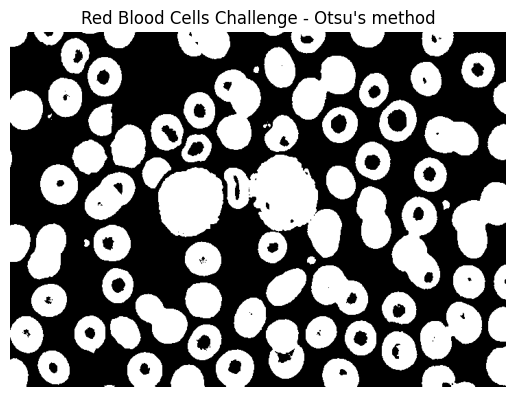

In [8]:
threshold_value, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(f'Thresholded value by Otsu\'s Method: {threshold_value}')

plt.imshow(thresholded_image, cmap='gray')
plt.title(f'{title} - Otsu\'s method')
plt.axis('off')
plt.show()

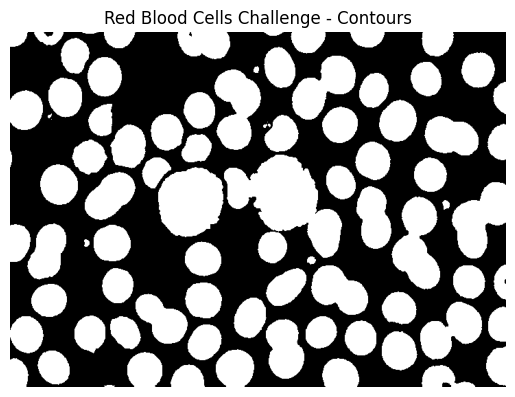

In [9]:
THRESHOLD = 1000

contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
holes = []

for countour in contours:
    area = cv2.contourArea(countour)
    if area < THRESHOLD:
        holes.append(countour)

cv2.drawContours(thresholded_image, holes, -1, 255, -1)

plt.imshow(thresholded_image, cmap='gray')
plt.title(f'{title} - Contours')
plt.axis('off')
plt.show()

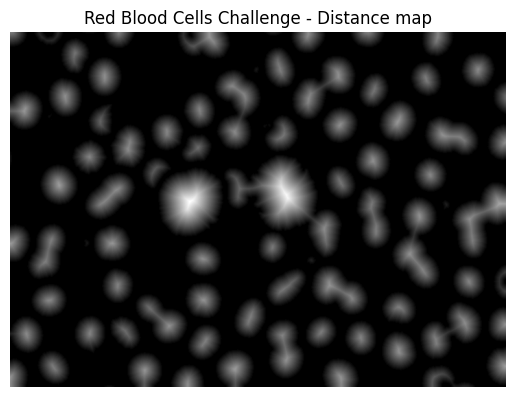

In [10]:
distance_map = ndi.distance_transform_edt(thresholded_image)

plt.imshow(distance_map, cmap='gray')
plt.title(f'{title} - Distance map')
plt.axis('off')
plt.show()

In [11]:
local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresholded_image)
local_max

/tmp/ipykernel_18301/2354914449.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresholded_image)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

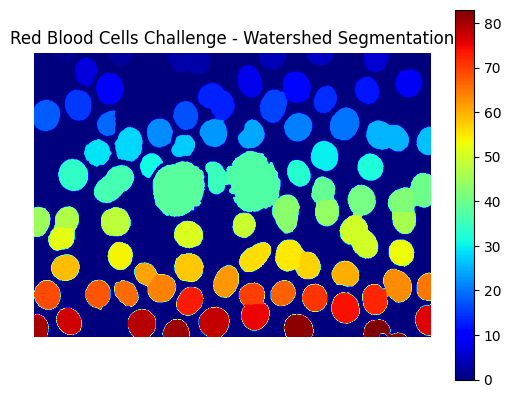

In [13]:
# Get the central pixel of each object.
markers = ndi.label(local_max, structure=np.ones((3,3)))[0]
# Get the watershed segmentation.
labels = watershed(-distance_map, markers, mask=thresholded_image)

plt.imshow(labels, cmap='jet')
plt.title(f'{title} - Watershed Segmentation')
plt.axis('off')
plt.colorbar()
plt.show()

In [15]:
# Normalization of color scale.
cmap = plt.cm.jet
norm = plt.Normalize(labels.min(), labels.max())
watershed_segmentation = cmap(norm(labels))

In [17]:
# Pixels normalization.
watershed_segmentation = ((watershed_segmentation * 255).astype(np.uint8))
watershed_segmentation = cv2.cvtColor(watershed_segmentation, cv2.COLOR_RGB2BGR)

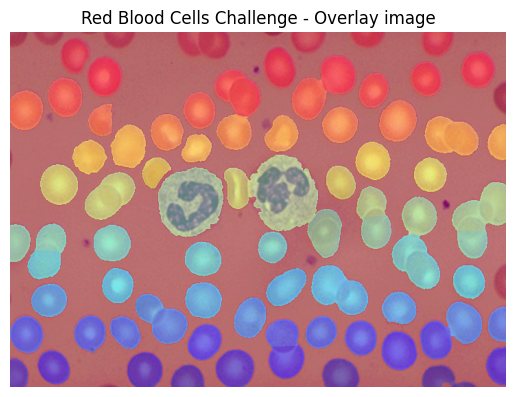

In [19]:
overlay_image = cv2.addWeighted(watershed_segmentation, 0.5, image, 0.5, 0)

plt.imshow(overlay_image)
plt.title(f'{title} - Overlay image')
plt.axis('off')
plt.show()